QAOA Results: {'01': 20, '10': 12, '00': 523, '11': 469}


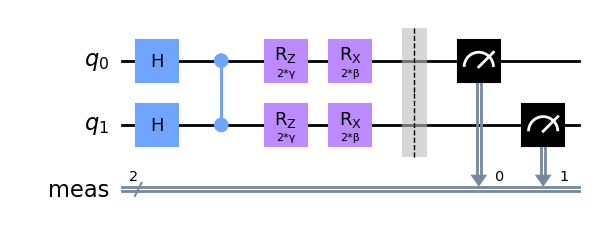

In [1]:
#-------------------------------------------------------------------------
# Quantum Approximate Optimization Algorithm - QAOA
# Chapter 5 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence:  MIT - Citation of this work required
#-------------------------------------------------------------------------
# Qiskit changes frequently. 
# We recommend using the latest version from the book code repository at:
# https://github.com/pedroer/quantum-computing-for-engineers/blob/main/requirements.txt
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit import Parameter

import warnings
warnings.filterwarnings('ignore')
from qiskit.visualization import circuit_drawer
#-------------------------------------------------------------------------

# Define parameters
# gamma: A parameter associated with the cost Hamiltonian. 
# gamma determines how strongly the cost Hamiltonian influences the evolution of the quantum state during the optimization.
gamma = Parameter('γ')

# beta: A parameter associated with the mixing Hamiltonian. 
# beta governs the amplitude mixing between different states in the quantum superposition.
beta  = Parameter('β')

# Create a QAOA circuit
qc = QuantumCircuit(2)
qc.h([0, 1])             # Initialize qubits in superposition
qc.cz(0, 1)              # Cost Hamiltonian
qc.rz(2 * gamma, [0, 1])
qc.rx(2 * beta, [0, 1])  # Mixing Hamiltonian
qc.measure_all()

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result    = execute(qc.bind_parameters({gamma: 1.0, beta: 0.5}), simulator, shots=1024).result()
counts    = result.get_counts()

# Print Results
print("QAOA Results:", counts)

# Draw the circuit
display(circuit_drawer(qc, output='mpl', style="iqp"))